In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Read the Bitcoin dataset
df = pd.read_csv('ETH.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to perform the Mann-Kendall test
def mann_kendall_test(x):
    n = len(x)
    s = 0
    for i in range(n - 1):
        for j in range(i + 1, n):
            if x[j] > x[i]:
                s += 1
            elif x[j] < x[i]:
                s -= 1
    var_s = (n * (n - 1) * (2 * n + 5)) / 18
    if s > 0:
        z = (s - 1) / np.sqrt(var_s)
    elif s < 0:
        z = (s + 1) / np.sqrt(var_s)
    else:
        z = 0
    p = 2 * (1 - norm.cdf(abs(z)))
    p = round(p, 4)  # Round p-value to four decimal places
    if z < 0:
        trend = "decreasing"
    elif z > 0:
        trend = "increasing"
    else:
        trend = "no trend"
    return trend, s, var_s, z, p

# Perform Mann-Kendall test for each column
results = {}
for column in df.columns[1:]:
    result = mann_kendall_test(df[column])
    results[column] = result

# Create a table of the results
table = pd.DataFrame.from_dict(results, orient='index', columns=['Trend', 'S', 'Var(S)', 'Z', 'P-value'])

# Print the table
print(table)

                Trend       S        Var(S)          Z  P-value
Open       increasing  695908  7.377073e+08  25.621772      0.0
High       increasing  688639  7.377073e+08  25.354143      0.0
Low        increasing  704876  7.377073e+08  25.951954      0.0
Close      increasing  696023  7.377073e+08  25.626006      0.0
Adj Close  increasing  696023  7.377073e+08  25.626006      0.0
Volume     increasing  935755  7.377073e+08  34.452414      0.0


                Trend       S        Var(S)          Z  P-value
Open       increasing  695908  7.377073e+08  25.621772      0.0
High       increasing  688639  7.377073e+08  25.354143      0.0
Low        increasing  704876  7.377073e+08  25.951954      0.0
Close      increasing  696023  7.377073e+08  25.626006      0.0
Adj Close  increasing  696023  7.377073e+08  25.626006      0.0
Volume     increasing  935755  7.377073e+08  34.452414      0.0


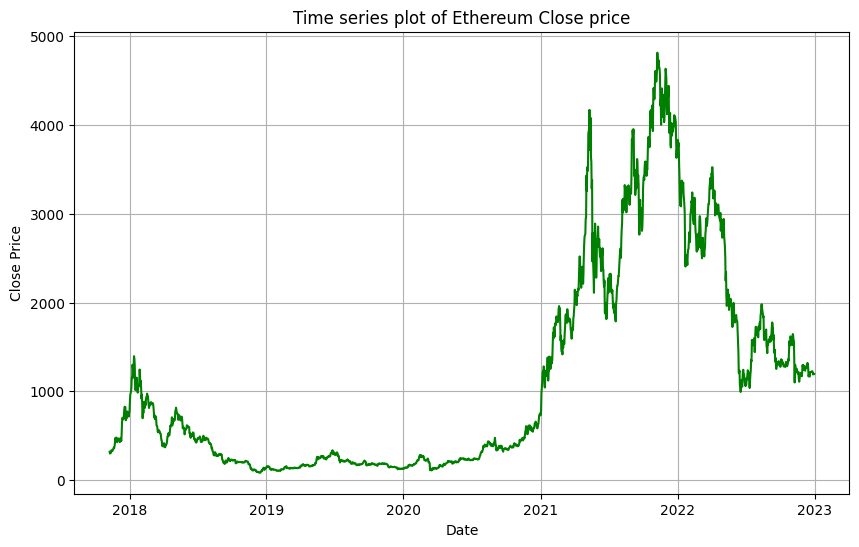

In [6]:
import matplotlib.pyplot as plt
# Plot time series of Close price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='green')
plt.title('Time series plot of Ethereum Close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Display the table
print(table)

# Show the plot
plt.show()